Задание 2
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
data = boston.data
feature_names = boston.feature_names

In [8]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
model = RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [35]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [36]:
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import r2_score

In [37]:
r2_score(y_test, y_pred)

0.8749965273218174

In [38]:
check_test = pd.DataFrame({'y_test': y_test['price'], 'y_pred': y_pred.flatten()}, columns=['y_test', 'y_pred'])

In [39]:
check_test.head(10)

,y_test,y_pred
173,23.6,22.846138
274,32.4,31.156114
491,13.6,16.297226
72,22.8,23.821036
452,16.1,17.212148
76,20.0,21.820092
316,17.8,19.866369
140,14.0,14.759938
471,19.6,21.235224
500,16.8,20.883103


У этой модели на этом наборе данных получается стабильно более высокая точность чем у LinearRegression из первой задачки похоже.. (Пробовал разные сиды в рандоме, разную глубину.. В любом случае выше)

* Задание 3
Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

In [41]:
for line in RandomForestRegressor.__doc__.split('\n'):
    print(line)

A random forest regressor.

    A random forest is a meta estimator that fits a number of classifying
    decision trees on various sub-samples of the dataset and uses averaging
    to improve the predictive accuracy and control over-fitting.
    The sub-sample size is always the same as the original
    input sample size but the samples are drawn with replacement if
    `bootstrap=True` (default).

    Read more in the :ref:`User Guide <forest>`.

    Parameters
    ----------
    n_estimators : integer, optional (default=10)
        The number of trees in the forest.

        .. versionchanged:: 0.20
           The default value of ``n_estimators`` will change from 10 in
           version 0.20 to 100 in version 0.22.

    criterion : string, optional (default="mse")
        The function to measure the quality of a split. Supported criteria
        are "mse" for the mean squared error, which is equal to variance
        reduction as feature selection criterion, and "mae" for the mean

In [42]:
model.feature_importances_

array([0.03211748, 0.00154999, 0.0070941 , 0.0011488 , 0.01436832,
       0.40270459, 0.01424477, 0.06403265, 0.00496762, 0.01169177,
       0.01808961, 0.0123114 , 0.41567892])

In [43]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [45]:
pd.DataFrame({'feature':boston.feature_names, 'importance': model.feature_importances_}, 
             columns=['feature', 'importance'])

,feature,importance
0,CRIM,0.032117
1,ZN,0.001550
2,INDUS,0.007094
3,CHAS,0.001149
4,NOX,0.014368
5,RM,0.402705
6,AGE,0.014245
7,DIS,0.064033
8,RAD,0.004968
9,TAX,0.011692


Впринципе вроде бы видно, что наиболее значимыми признаками являются Количество Комнат: RM, 
и процент населения с низким статусом: LSTAT.. Построим диаграммку.

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

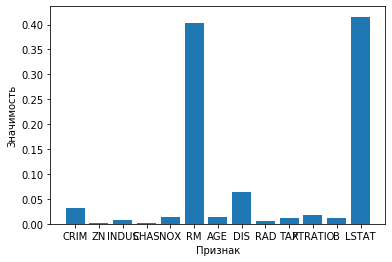

In [49]:
plt.bar(boston.feature_names, model.feature_importances_)
plt.xlabel('Признак')
plt.ylabel('Значимость')
plt.draw()